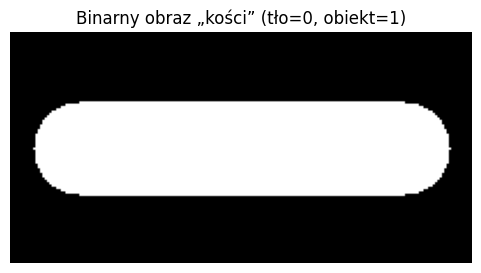

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parametry obrazu
H, W = 100, 200            # rozmiar obrazu
R = 20                     # promień „główki” kości
y0, x0 = H//2,  R + 10     # środek lewego okręgu
y1, x1 = H//2, W - R - 10  # środek prawego okręgu

# 2. Tworzymy puste tło
img = np.zeros((H, W), dtype=np.uint8)

# 3. Maska okręgów
yy, xx = np.ogrid[:H, :W]
mask_left  = (yy - y0)**2 + (xx - x0)**2 <= R**2
mask_right = (yy - y1)**2 + (xx - x1)**2 <= R**2

# 4. Maska prostokątnego łącznika
#    od x0 do x1, w węższym zakresie w pionie ±R
mask_bar = (xx >= x0) & (xx <= x1) & (yy >= y0 - R) & (yy <= y0 + R)

# 5. Łączymy i ustawiamy 1 na obiekcie
img[mask_left | mask_right | mask_bar] = 1

# 6. Podgląd
plt.figure(figsize=(6,3))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Binarny obraz „kości” (tło=0, obiekt=1)")
plt.show()


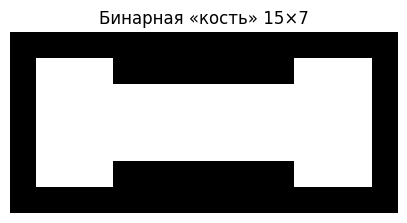

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Задаём размеры
H, W = 7, 15

# 2) Создаём нулевую матрицу
bone = np.zeros((H, W), dtype=np.uint8)

# 3) Рисуем через срезы:

bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # тонкий прямоугольник-перемычка (1 строка высотой)


# 4) Отобразим результат
plt.figure(figsize=(5,3))
plt.imshow(bone, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Бинарная «кость» 15×7")
plt.show()


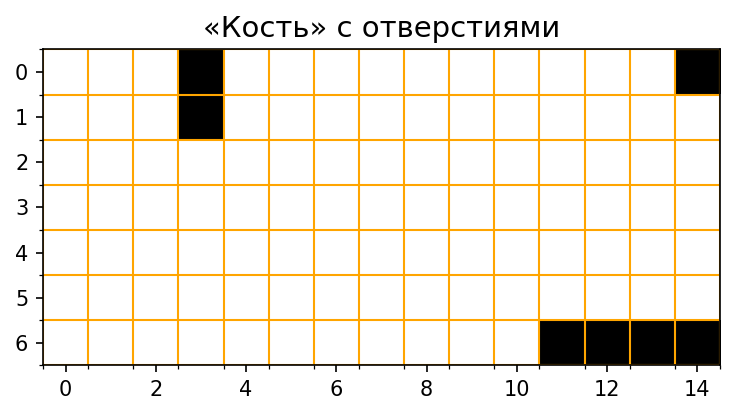

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[0:7,  0:15]   = 1    # левая головка
bone[6:7,  11:15]   = 0 
bone[0:2,  3:4]   = 0
# 2) Дырки по рисунку (строка 2, столбцы 2 и 12)
bone[0, 14]  = 0   # левое отверстие


selem = np.ones((3,3), dtype=bool)

# 3) Рисуем только одну ось
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.imshow(bone, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
ax.set_title("«Кость» с отверстиями", fontsize=14)
ax.axis('on')

# 4) Оранжевая микросетка по пикселям
ax.set_xticks(np.arange(-.5, W, 1), minor=True)
ax.set_yticks(np.arange(-.5, H, 1), minor=True)
ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

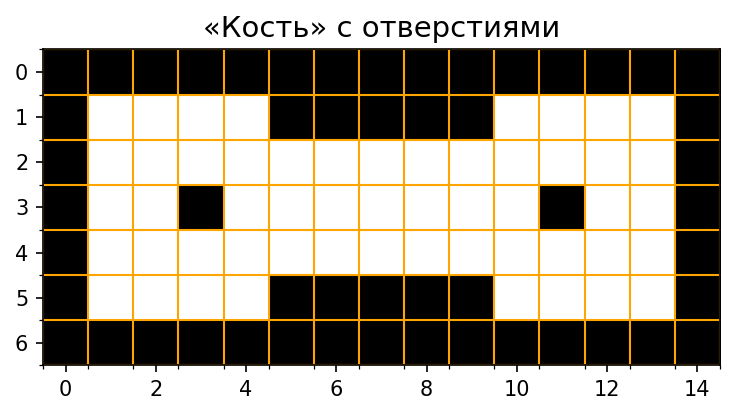

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6,  1:5]   = 1    # левая головка
bone[1:6, 10:14]  = 1    # правая головка
bone[2:5,  4:11]  = 1    # перемычка

# 2) Дырки по рисунку (строка 2, столбцы 2 и 12)
bone[3, 3]  = 0   # левое отверстие
bone[3, 11] = 0   # правое отверстие

#маска под эрозию 
selem = np.array([
    [1,1,1],
    [1,0,1],
    [1,1,1]
], dtype=bool)

# 3) Рисуем только одну ось
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.imshow(bone, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
ax.set_title("«Кость» с отверстиями", fontsize=14)
ax.axis('on')

# 4) Оранжевая микросетка по пикселям
ax.set_xticks(np.arange(-.5, W, 1), minor=True)
ax.set_yticks(np.arange(-.5, H, 1), minor=True)
ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


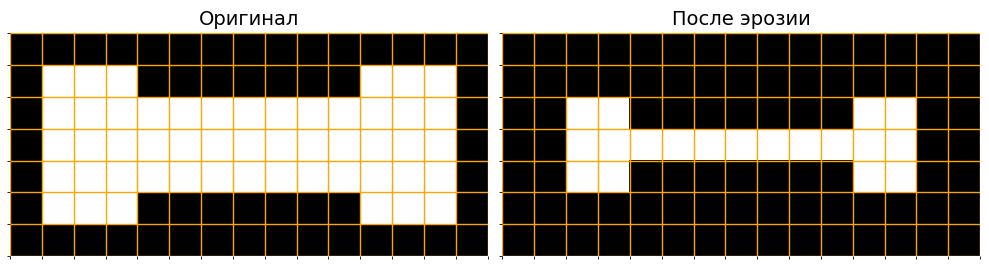

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # перемычка

# 2) Структурный элемент B (крест 3×3)
selem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=bool)

# 3) Применяем бинарную эрозию
eroded = binary_erosion(bone, footprint=selem).astype(np.uint8)

# 4) Визуализация с оранжевой сеткой по пикселям
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for ax, img, title in zip((ax1, ax2), (bone, eroded), ("Оригинал", "После эрозии")):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1,
              interpolation='none', aspect='equal')
    ax.set_title(title, fontsize=14)

    # убрать рамку и метки, но оставить сетку
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

    # мелкие тики на границах пикселей
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)

    # включаем микросетку оранжевым
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


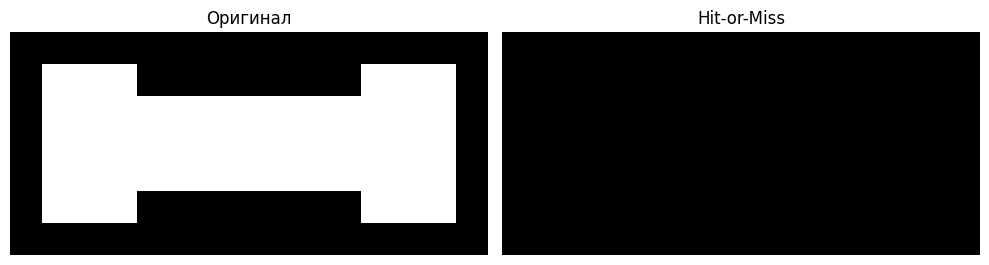

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#  1. Генерация «кости» 7×15 (с тонкой перемычкой 1 строка высотой) 
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # перемычка


#  2. Задаём структурный элемент (рис. 1) 
# must_exist (синие квадраты на средней строке):
on_offsets  = [(0, -1), (0, 0), (0, 1)]
# must_not_exist (белые квадраты в углах):
off_offsets = [(-1, -1), (-1, 1), (1, -1), (1, 1), (-1,0) ]
# «крестики» (верхний-средний и нижний-средний) — don't care

#  3. Хит-энд-мисс (реализация вручную) 
hitmiss = np.zeros_like(bone)
for i in range(1, H-1):
    for j in range(1, W-1):
        # проверяем, что все нужные единицы есть
        fits_on  = all(bone[i+dy, j+dx] == 1 for dy, dx in on_offsets)
        # проверяем, что в углах нули
        fits_off = all(bone[i+dy, j+dx] == 0 for dy, dx in off_offsets)
        if fits_on and fits_off:
            hitmiss[i, j] = 1

#  4. Визуализация 
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))

for ax, img, title in zip((ax0, ax1), (bone, hitmiss), ("Оригинал", "Hit-or-Miss")):
    ax.imshow(img, cmap='gray', interpolation='none', aspect='equal')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


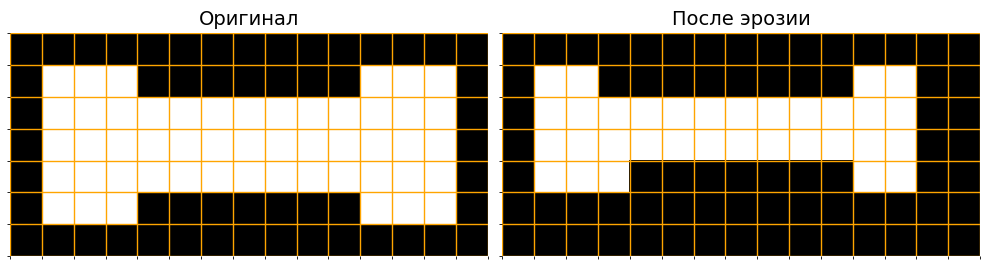

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # перемычка

# 2) Структурный элемент B (крест 3×3)
selem = np.array([
    [0,0,0],
    [0,1,1],
    [0,1,0]
], dtype=bool)

# 3) Применяем бинарную эрозию
eroded = binary_erosion(bone, footprint=selem).astype(np.uint8)

# 4) Визуализация с оранжевой сеткой по пикселям
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for ax, img, title in zip((ax1, ax2), (bone, eroded), ("Оригинал", "После эрозии")):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1,
              interpolation='none', aspect='equal')
    ax.set_title(title, fontsize=14)

    # убрать рамку и метки, но оставить сетку
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

    # мелкие тики на границах пикселей
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)

    # включаем микросетку оранжевым
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

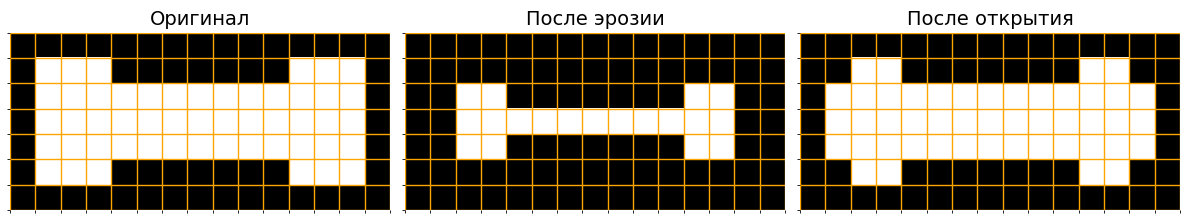

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation, binary_erosion

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # перемычка

# 2) Структурный элемент B (крест 3×3)
selem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=bool)

# 3) Операции эрозии и дилатации (открытие)
eroded = binary_erosion(bone, footprint=selem).astype(np.uint8)
opened  = binary_dilation(eroded, footprint=selem).astype(np.uint8)

# 4) Визуализация с оранжевой сеткой по пикселям
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

for ax, img, title in zip(
        (ax1, ax2, ax3),
        (bone, eroded, opened),
        ("Оригинал", "После эрозии", "После открытия")
    ):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1,
              interpolation='none', aspect='equal')
    ax.set_title(title, fontsize=14)

    # отключаем рамку и метки
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

    # мелкие тики по границам пикселей
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)

    # микросетка оранжевым цветом
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


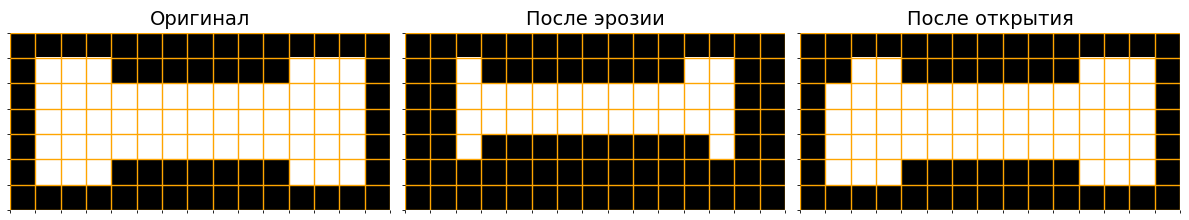

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation, binary_erosion

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # перемычка

# 2) Структурный элемент B (крест 3×3)
selem = np.array([
    [0,0,0],
    [0,1,1],
    [1,1,1]
], dtype=bool)

# 3) Операции эрозии и дилатации (открытие)
eroded = binary_erosion(bone, footprint=selem).astype(np.uint8)
opened  = binary_dilation(eroded, footprint=selem).astype(np.uint8)

# 4) Визуализация с оранжевой сеткой по пикселям
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))


for ax, img, title in zip(
        (ax1, ax2, ax3),
        (bone, eroded, opened),
        ("Оригинал", "После эрозии", "После открытия")
    ):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1,
              interpolation='none', aspect='equal')
    ax.set_title(title, fontsize=14)

    # отключаем рамку и метки
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

    # мелкие тики по границам пикселей
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)

    # микросетка оранжевым цветом
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


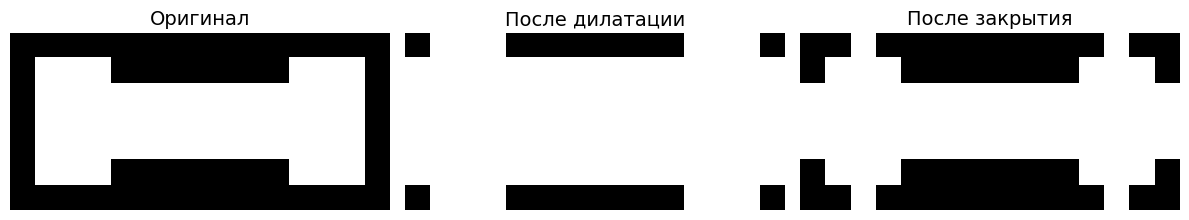

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation, binary_erosion

# 1) Генерация «кости» 7×15
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:4]   = 1    # левая головка
bone[1:6, 11:14] = 1    # правая головка
bone[2:5, 4:11]  = 1    # перемычка

# 2) Структурный элемент B (крест 3×3)
selem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=bool)

# 3) Операция закрытия (дилатация затем эрозия)
dilated = binary_dilation(bone, footprint=selem).astype(np.uint8)
closed  = binary_erosion(dilated, footprint=selem).astype(np.uint8)

# 4) Визуализация с оранжевой пиксельной сеткой
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

titles = ("Оригинал", "После дилатации", "После закрытия")
images = (bone, dilated, closed)

for ax, img, title in zip((ax1, ax2, ax3), images, titles):
    ax.imshow(img, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
    ax.set_title(title, fontsize=14)
    ax.axis('off')
    # мелкие тики на границах пикселей
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)
    # оранжевая микросетка
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()



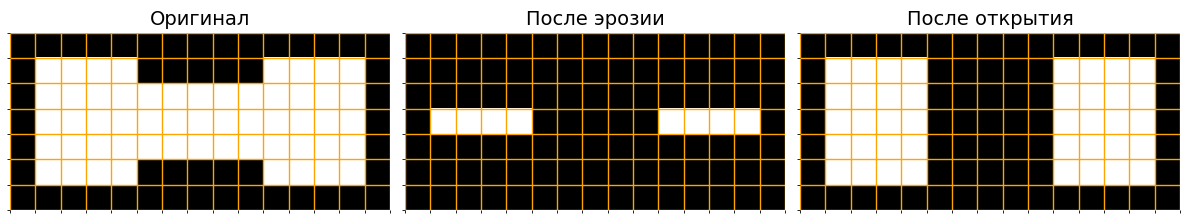

In [11]:
from skimage.morphology import binary_erosion, binary_dilation
import numpy as np

#   «bone» 
H, W = 7, 15
bone = np.zeros((H, W), dtype=np.uint8)
bone[1:6, 1:5]   = 1
bone[1:6, 10:14] = 1
bone[2:5, 4:11]  = 1  # перемычка

# вертикальный  5×1 
selem_vert = np.ones((5,1), dtype=bool)

#  открытие: сначала эрозия, потом дилатация 
eroded = binary_erosion(bone, footprint=selem_vert).astype(np.uint8)
opened = binary_dilation(eroded, footprint=selem_vert).astype(np.uint8)

# 4) Визуализация с оранжевой сеткой по пикселям
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))


for ax, img, title in zip(
        (ax1, ax2, ax3),
        (bone, eroded, opened),
        ("Оригинал", "После эрозии", "После открытия")
    ):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1,
              interpolation='none', aspect='equal')
    ax.set_title(title, fontsize=14)

    # отключаем рамку и метки
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

    # мелкие тики по границам пикселей
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)

    # микросетка оранжевым цветом
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte
from skimage.color import rgba2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import closing, binary_dilation, square

#  1) Загрузка и удаление альфы 
rgba   = io.imread('text.png')  # RGBA
rgb    = rgba2rgb(rgba)                  # на белый фон

#  2) Градации серого 8-bit 
gray8  = img_as_ubyte(color.rgb2gray(rgb))

#  3) Бинаризация текста (тёмное = 1) 
th     = threshold_otsu(gray8)
binary = (gray8 < th).astype(np.uint8)

# 4) Закрытие (closing) для «запаивания» разрывов штрихов 
dilation = binary_dilation(binary, square(3)).astype(np.uint8)

#  5) Дилатация для утолщения штрихов 
#final  = binary_dilation(closed, square(3)).astype(np.uint8)

# 6) Список этапов и имена файлов 
stages = [
    (rgba,    None,  'stage1_rgba.png'),
    (gray8,  'gray', 'stage2_gray8.png'),
    (binary, 'gray', 'stage3_binary.png'),
    (dilation, 'gray', 'stage4_dilation.png'),
    ]

#  7) Сохраняем каждый этап в крупном формате 
for img_stage, cmap, filename in stages:
    fig = plt.figure(figsize=(10, 4), dpi=200)
    plt.imshow(img_stage, cmap=cmap, interpolation='none', aspect='equal')
    plt.axis('off')
    fig.savefig(filename, dpi=200, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

print("Все этапы сохранены в файлы stage1_rgba.png … stage5_final.png")



C:\Users\ALIAK\AppData\Local\Temp\ipykernel_5832\2648567960.py:20: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  dilation = binary_dilation(binary, square(3)).astype(np.uint8)


Все этапы сохранены в файлы stage1_rgba.png … stage5_final.png


C:\Users\ALIAK\AppData\Local\Temp\ipykernel_5832\3437583361.py:21: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  closed   = closing(binary, square(3)).astype(np.uint8)
C:\Users\ALIAK\AppData\Local\Temp\ipykernel_5832\3437583361.py:24: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  final    = binary_dilation(closed, square(3)).astype(np.uint8)


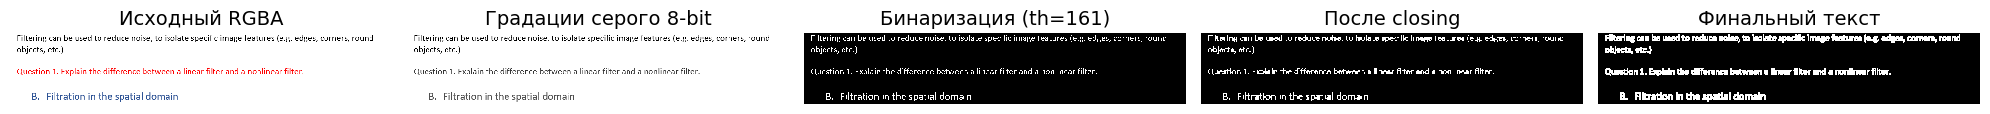

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte
from skimage.color import rgba2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import closing, binary_dilation, square

# 1) Загрузка и удаление альфы
rgba = io.imread('text.png')  # читаем RGBA
rgb  = rgba2rgb(rgba)                   # накладываем на белый фон

# 2) Преобразование в градации серого и 8-бит
gray  = color.rgb2gray(rgb)             # float [0..1]
gray8 = img_as_ubyte(gray)              # uint8 [0..255]

# 3) Порог Отсу и бинаризация (текст черный = True)
th       = threshold_otsu(gray8)
binary   = (gray8 < th).astype(np.uint8)

# 4) Морфологическое closing (запаиваем мелкие разрывы)
closed   = closing(binary, square(3)).astype(np.uint8)

# 5) Дополнительная дилатация для утолщения штрихов
final    = binary_dilation(closed, square(3)).astype(np.uint8)

# 6) Визуализация этапов
stages = [
    (rgba,    None,  "Исходный RGBA"),
    (gray8,  'gray', "Градации серого 8-bit"),
    (binary, 'gray', f"Бинаризация (th={th})"),
    (closed, 'gray', "После closing"),
    (final,  'gray', "Финальный текст")
]

fig, axes = plt.subplots(1, len(stages), figsize=(20, 5))
for ax, (img_stage, cmap, title) in zip(axes, stages):
    ax.imshow(img_stage, cmap=cmap, interpolation='none', aspect='equal')
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


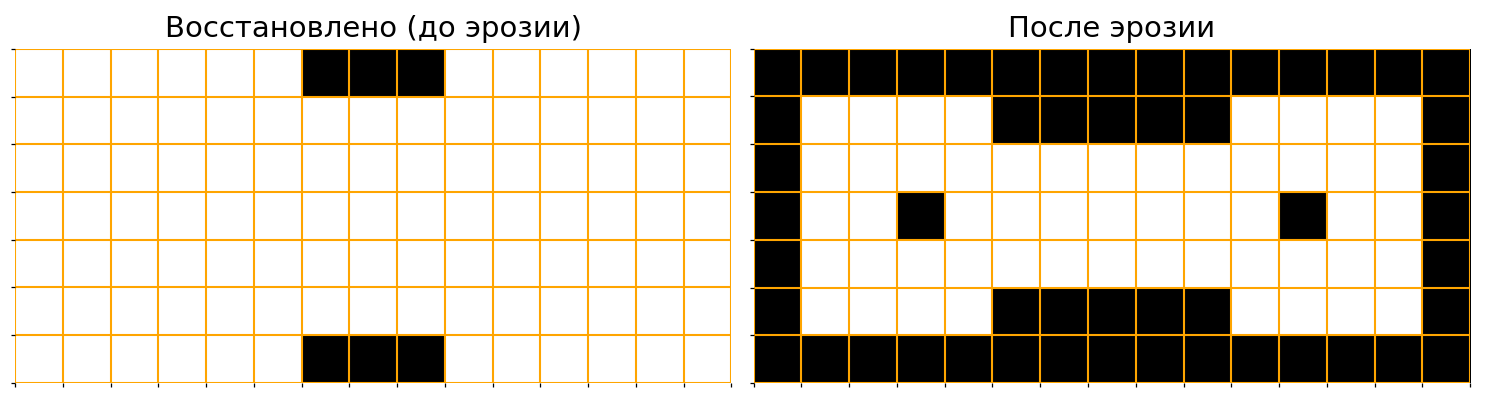

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation

# 1) Генерация «кости» 7×15 с дырами после эрозии
H, W = 7, 15
eroded_bone = np.zeros((H, W), dtype=np.uint8)
eroded_bone[1:6,  1:5]   = 1    # левая головка
eroded_bone[1:6, 10:14]  = 1    # правая головка
eroded_bone[2:5,  4:11]  = 1    # перемычка
# дыры
eroded_bone[3, 3]  = 0   
eroded_bone[3, 11] = 0   

# 2) Структурный элемент, которым производилась эрозия
selem = np.array([
    [1,1,1],
    [1,0,1],
    [1,1,1]
], dtype=bool)

# 3) Дилатация для «обратной» операции
restored = binary_dilation(eroded_bone, footprint=selem).astype(np.uint8)

# 4) Визуализация до и после в большом формате
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=150)

for ax, img, title in zip(
    (ax1, ax2),
    (restored, eroded_bone),
    ("Восстановлено (до эрозии)", "После эрозии")
):
    ax.imshow(img, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
    ax.set_title(title, fontsize=14)
    # микросетка по пикселям
    ax.set_xticks(np.arange(-.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-.5, H, 1), minor=True)
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)
    # скрываем спины и метки
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()





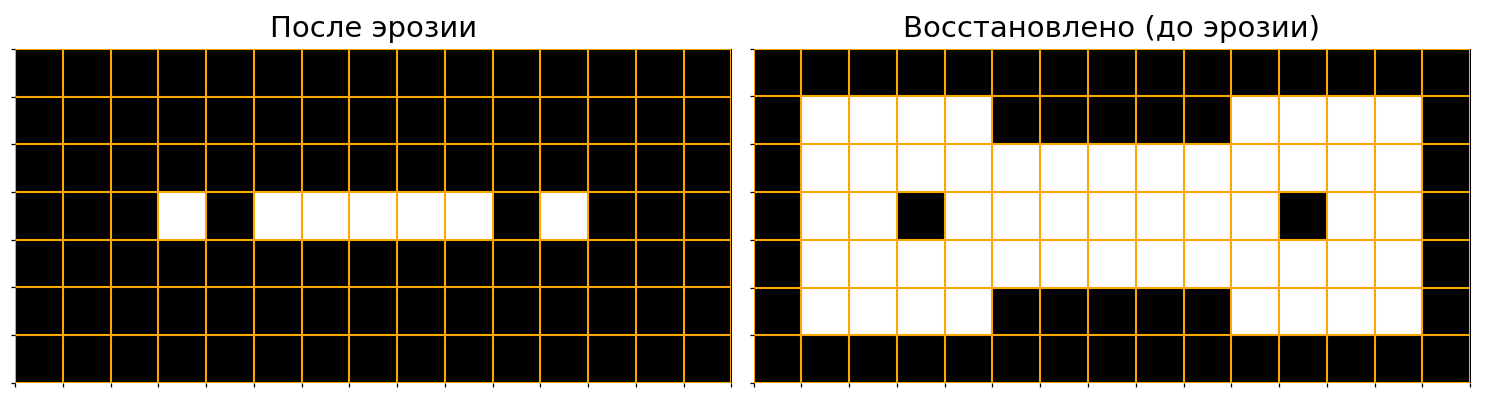

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion

# 1) Генерация «кости» 7×15 с дырами после эрозии
H, W = 7, 15
eroded_bone = np.zeros((H, W), dtype=np.uint8)
eroded_bone[1:6,  1:5]   = 1    # левая головка
eroded_bone[1:6, 10:14]  = 1    # правая головка
eroded_bone[2:5,  4:11]  = 1    # перемычка
# дыры
eroded_bone[3, 3]  = 0   
eroded_bone[3, 11] = 0   


# 2) Структурный элемент, которым производилась эрозия
selem_full= np.array([
    [1,1,1],
    [1,0,1],
    [1,1,1]
], dtype=bool)

# 3) Применяем эрозию 
eroded_result = binary_erosion(eroded_bone, footprint=selem_full).astype(np.uint8)

'''# --- 4) Визуализация обоих этапов в крупном формате ---
for img, title, fname in [
    (eroded_bone,   "Исходная «кость» с отверстиями", "zad11_original.png"),
    (eroded_result,"Результат эрозии 3×3",          "zad11_eroded.png")
]:
    fig = plt.figure(figsize=(8, 3), dpi=200)
    plt.imshow(img, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
    plt.title(title, fontsize=16)
    plt.axis('off')
    fig.savefig(fname, dpi=200, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)'''

# 4) Визуализация до и после в большом формате
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=150)

for ax, img, title in zip(
    (ax1, ax2),
    (eroded_result, eroded_bone),
    ( "После эрозии","Восстановлено (до эрозии)")
):
    ax.imshow(img, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
    ax.set_title(title, fontsize=14)
    # микросетка по пикселям
    ax.set_xticks(np.arange(-.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-.5, H, 1), minor=True)
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)
    # скрываем спины и метки
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()


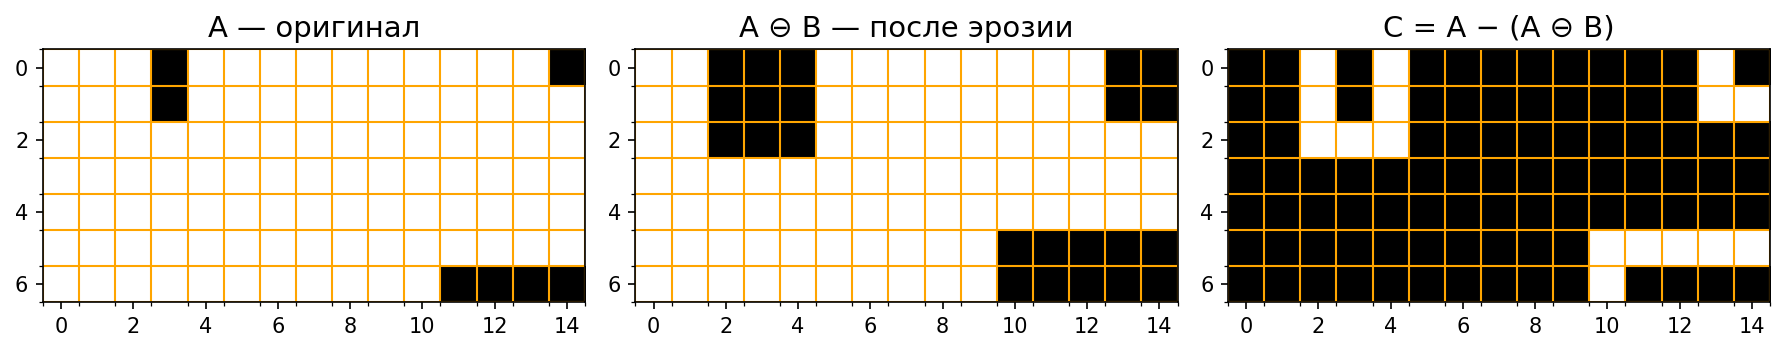

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion


# 1) Копируем вашу генерацию „кости” (A) из последнего фрагмента:
H, W = 7, 15
A = np.zeros((H, W), dtype=np.uint8)
A[0:7,  0:15] = 1     # весь прямоугольник
A[6:7, 11:15] = 0     # вырез снизу справа
A[0:2,  3:4]  = 0     # вырез сверху в центре
A[0,    14]  = 0     # вырез в правом верхнем углу

# 2) Структурный элемент B (3×3 полный квадрат)
B = np.ones((3, 3), dtype=bool)

# 3) Эрозия: A ⊖ B
Ae = binary_erosion(A, footprint=B).astype(np.uint8)

# 4) Вычисляем C = A – (A ⊖ B)
C = A - Ae


# 5) Визуализация A, A⊖B и C
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150)
titles = ["A — оригинал", "A ⊖ B — после эрозии", "C = A − (A ⊖ B)"]
images = [A, Ae, C]

for ax, img, title in zip((ax1, ax2, ax3), images, titles):
    ax.imshow(img,
              cmap='gray',
              interpolation='none',
              aspect='equal',
              vmin=0, vmax=1)
    ax.set_title(title, fontsize=14)
    ax.axis('on')
    # оранжевая микросетка по границам пикселей
    ax.set_xticks(np.arange(-.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-.5, H, 1), minor=True)
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


C:\Users\ALIAK\AppData\Local\Temp\ipykernel_5832\2480263693.py:18: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  B     = square(3)


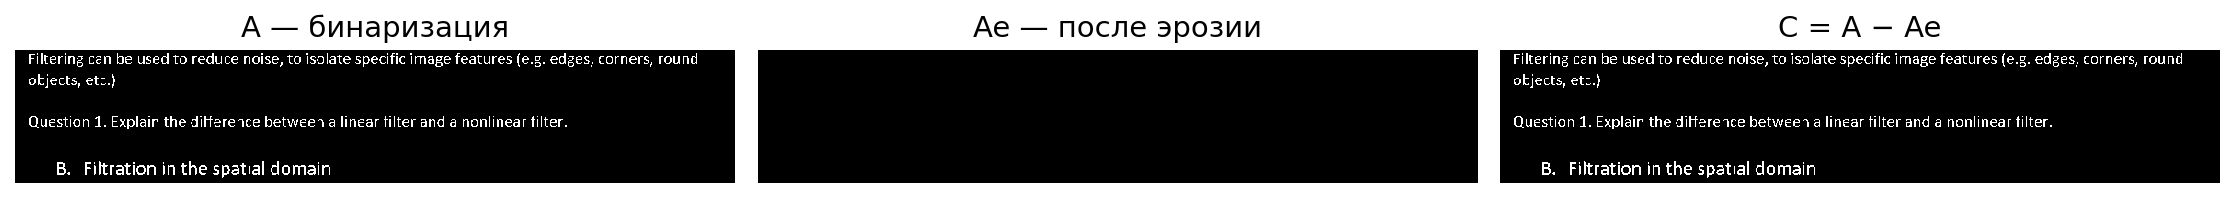

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte
from skimage.color import rgba2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion, square

# 1) Загрузка, удаление альфы и перевод в 8-битный серый
rgba  = io.imread('text.png')
rgb   = rgba2rgb(rgba)
gray8 = img_as_ubyte(color.rgb2gray(rgb))

# 2) Бинаризация методом Оцу → A
th    = threshold_otsu(gray8)
A     = (gray8 < th).astype(np.uint8)

# 3) Структурный элемент B = 3×3 полный квадрат
B     = square(3)

# 4) Эрозия Ae = A ⊖ B
Ae    = binary_erosion(A, footprint=B).astype(np.uint8)

# 5) Разность C = A − Ae
C     = A - Ae

# 6) Визуализация трёх этапов
H, W = A.shape
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
titles = ["A — бинаризация", "Ae — после эрозии", "C = A − Ae"]
images = [A, Ae, C]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray', interpolation='none', aspect='equal', vmin=0, vmax=1)
    ax.set_title(title, fontsize=14)
    ax.axis('off')
    # оранжевая микросетка по пикселям
    ax.set_xticks(np.arange(-.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-.5, H, 1), minor=True)
    ax.grid(which='minor', color='orange', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte
from skimage.color import rgba2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import closing, binary_dilation, square, binary_erosion

#  1) Загрузка и удаление альфы 
rgba   = io.imread('text.png')  # RGBA
rgb    = rgba2rgb(rgba)                  # на белый фон

# 2) Градации серого 8-bit 
gray8  = img_as_ubyte(color.rgb2gray(rgb))

#  3) Бинаризация текста (тёмное = 1)
th     = threshold_otsu(gray8)
binary = (gray8 < th).astype(np.uint8)

# 4) Закрытие (closing) для «запаивания» разрывов штрихов 
erosion = binary_erosion(binary, square(3)).astype(np.uint8)
c=binary-erosion
#  5) Дилатация для утолщения штрихов 
#final  = binary_dilation(closed, square(3)).astype(np.uint8)

#  6) Список этапов и имена файлов 
stages = [
    (rgba,    None,  'stage1_rgba.png'),
    (gray8,  'gray', 'stage2_gray8.png'),
    (binary, 'gray', 'stage3_binary.png'),
    (erosion, 'gray', 'stage4_dilation.png'),
    (c, 'gray', 'stage5_b-e.png')
    ]

# 7) Сохраняем каждый этап в крупном формате 
for img_stage, cmap, filename in stages:
    fig = plt.figure(figsize=(10, 4), dpi=200)
    plt.imshow(img_stage, cmap=cmap, interpolation='none', aspect='equal')
    plt.axis('off')
    fig.savefig(filename, dpi=200, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

print("Все этапы сохранены в файлы stage1_rgba.png … stage5_final.png")

C:\Users\ALIAK\AppData\Local\Temp\ipykernel_5832\3252140775.py:20: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  erosion = binary_erosion(binary, square(3)).astype(np.uint8)


Все этапы сохранены в файлы stage1_rgba.png … stage5_final.png


Pytanie 1
W ujęciu cyfrowego przetwarzania obrazów „morfologiczny” oznacza wszelkie operacje, które działają na kształtach i strukturze obrazu, a nie na jego wartościach intensywności bezpośrednio.

Zasadniczo stosuje się tu tzw. element strukturalny (małą maskę), którą „przesuwamy” po obrazie i na podstawie jego zgodności z lokalnym sąsiedztwem:

Erozja „ściąga” krawędzie obiektów,

Dylatacja je „poszerza”,

Otwarcie/Zamknięcie łączą te dwie operacje w celu usunięcia drobnych artefaktów lub wypełnienia szczelin.

Wszystkie te działania bazują na analizie kształtu (morfologii) obiektów, a nie na liniowym filtrowaniu wartości pikseli.

Pytanie 2
Element strukturalny to niewielka, binarna maska (zwykle kwadratowa macierz 3×3, 5×5 itp.), stosowana jako „szablon” przy operacjach morfologicznych.

Centrum (origin)
Oznaczone zwykle pomarańczową kropką – to pozycja w elemencie strukturalnym, która odpowiada bieżącemu pikselowi wejściowego obrazu, i w tym miejscu zostanie zapisana nowa wartość (1 lub 0).

Elementy „must‐exist” (1)
Zaznaczone pełnym (niebieskim) kwadratem – w tych pozycjach maski musi być 1 w oryginalnym obrazie (piksel obiektu), żeby dany fragment strukturalnego elementu „wpasował się” i operacja (np. erozja) zadziałała.

Elementy „must‐not‐exist” (0)
Zaznaczone białym kwadratem – w tych pozycjach musi być 0 w oryginalnym obrazie (piksel tła). Jeśli tam znajdzie się 1, dopasowanie nie zachodzi.

Elementy „don’t care” (X)
Oznaczone krzyżykiem – te pozycje maski są obojętne, nie są weryfikowane ani na 1, ani na 0.

Pytanie 3
W morfologii cyfrowej obiektem nazywamy zbiór „jedynkowych” pikseli (w binarnej masce) – czyli wszystkich pikseli, które nie należą do tła. W binarnym obrazie piksel o wartości 1 (lub 255) jest częścią obiektu, piksel o wartości 0 to tło. Wszystkie operacje (erozja, dylatacja, otwarcie, zamknięcie) analizują i przekształcają właśnie te obszary obiektu.



Pytanie 4. 
– Obraz bitowy (binarne) to obraz, w którym piksele mogą przyjmować tylko dwie wartości, najczęściej 0 (tło) i 1 (obiekt).
– Otrzymuje się go przez progowanie obrazu w skali szarości (lub koloru):

Zamieniamy obraz na odcienie szarości (float w [0…1] lub uint8 w [0…255]).

Wybieramy próg T (np. 127 w skali 0–255 albo automatycznie metodą Otsu).

Tworzymy maskę

Pytanie 5
Erozja to podstawowa operacja morfologiczna, której celem jest sprowadzenie obiektu do mniejszych rozmiarów – „obgryzienie” jego krawędzi. Formalnie dla obrazu A i elementu strukturalnego B definiujemy
A⊖B={p∣B⊂A}

Pytanie 6
W kroku n  pod oknem B znajdują się wszystkie wymagane  pola (must-exist) oraz żadne pola „must-not” (czyli białe). W konsekwencji element strukturalny wpisuje się w obraz – spełnione są warunki erozji – więc centralny piksel zostaje (przyjmujemy 1). W kroku 2 czy wcześniejszych brakuje choćby jednego sąsiedniego piksela i wtedy wartość była zerowana.

Pytanie 7
Moment połączenia (wąski mostek) ma grubość mniejszą niż rozmiar naszego SE. Aby go „odciąć”, wystarczy użyć SE o szerokości większej niż szerokość mostka , np.: SE 5x1

Pytanie 8
Różny kształt (i rozmiar) elementu strukturalnego wprost determinuje, które lokalne wzorce kształtu będą na obrazie zachowane, a które usunięte lub rozbudowane.

Pytanie 9
Dylatacja to podstawowa operacja morfologiczna, odwrotna do erozji – „poszerza” obiekty, „zapychając” niewielkie ubytki i łącząc przylegające elementy.
Słowny opis algorytmu
Weź piksel p=(i,j) w obrazie wyjściowym.

Nałóż element strukturalny B tak, aby jego centrum trafiło na p.

Sprawdź wszystkie pozycje „must-exist” w B:

Jeżeli przynajmniej jeden z tych przesuniętych względem p pikseli w oryginalnym obrazie A ma wartość 1,

Wynik: ustaw w wyjściu na pozycji p wartość 1.
Jeśli natomiast żaden piksel pod maską nie jest 1, wypisz 0.

Powtórz dla wszystkich p.

Pytanie 10
Otwarcie (opening) to dwustopniowa operacja morfologiczna, polegająca na pierwszej erozji, a następnie dylatacji z tym samym elementem strukturalnym.
Usuwanie szumów typu „salt-and-pepper”
Rozdzielanie połączonych obiektów
Wygładzanie konturów
Przygotowanie do analizy kształtów
Maskowanie i filtracja obiektów o nietypowych rozmiarach

Pytanie 11
Domknięcie (closing) to operacja: najpierw dylatacja, potem erozja z tym samym elementem strukturalnym. W cyfrowym przetwarzaniu obrazów stosuje się ją przede wszystkim do:
Wypełniania drobnych “dziur” w obiektach
Łączenia rozłączonych fragmentów
Wygładzania krawędzi od zewnątrz
Przygotowania masek do analizy
Eliminacji szumu typu “pepper”
Ujednolicania tła

Pytanie 12
Dylatacja „rozszerza” obszary obiektów w binarnym obrazie:dzięki niej poszczególne, cienkie elementy (np. litery w tekście) stają się grubsze, a niewielkie przerwy i szpary w ich konturach zostają wypełnione.
Powtórzenie jej wielokrotnie (lub użycie większego SE) spowoduje coraz większe „rozpływanie się” obiektu: litery mogą się zlać ze sobą, utracą detale i wyjść poza ramkę. 

Algorytm z Zadań 11 i 12 (najpierw erozja, potem różnica C = A – (A⊖B)) to w istocie wydobycie „obrzeża” obiektu – pozostawiamy jedynie te piksele, które zostały skasowane przez erozję. Ma to kilka praktycznych zastosowań:

Detekcja konturów
– Zamiast liczyć gradienty czy Sobela, można uzyskać binarną maskę samych obrzeży obiektu. Przydaje się to np. w analizie krawędzi prostych linii lub kształtów, gdy chcemy wiedzieć, gdzie zaczyna się obiekt.

Pomiar grubości i szerokości elementów
– Mając oryginalny obiekt i jego erozję, możemy porównując obie maski określić, o ile pikseli „zredukował się” obiekt w każdym miejscu – to znaczy zmierzyć lokalną grubość czy promień zakrzywień.

Śledzenie zmian kształtu
– W analizie czasu (np. w wideo) pozwala łatwo porównać, jak pęcznieją lub kurczą się obiekty, monitorując, które piksele wchodzą lub wychodzą na obrzeże.

Przygotowanie do dalszej klasyfikacji
– W OCR-ie, medycznej segmentacji czy w inspekcji przemysłowej wyodrębnienie samych krawędzi pozwala zbudować cechy (features) oparte o kontury – długość, prostoliniowość, kąty narożników.

Operacje „top-hat” i analiza niejednorodności
– Różnica A – (A⊖B) to właśnie białe top-hat:

A−(A⊖B), używana do podkreślania małych elementów jaśniejszych od otoczenia (np. wypukłości, wykwitów czy małych punktów).